<a href="https://colab.research.google.com/github/99jiayi/ISYS5002/blob/main/05_Working_with_Files.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **File Input & Output**
For program to retain data between the times it is run, you must save the data
- Data is saved to a file, typically on computer disk
- Saved data can be retrieved and used at a later time

“***Writing data to***”: saving data on a file
<br>***Output file***: a file that data is written to
<br>*“**Reading data from**”*: process of retrieving data from a file
<br>***Input file***: a file from which data is read

Three steps when a program uses a file
- Open the file
- Process the file
- Close the file

**Types of files**
<br>
- A **text file** is a sequence of characters
- A **binary file** (for images, videos and more) is a sequence of bytes
- First character in a text file or byte in a binary file is located at position 0
  - In a file of n characters or bytes, the highest position number is n – 1 (**end-of-file marker**)
- For each file you **open**, Python creates a **file object** that you’ll use to interact with the file


**Comma-separated values (CSV) file**
- CSV files are the most common format used for importing and exporting data from spreadsheets and databases.
- CSV files are text files that have delimiters. A delimiter is a character that separates data values.



# Text File

## File `open` Function

`file_variable = open(filename, mode)`

**Mode**: string specifying how the file will be opened

Example: reading only ('r'), writing ('w'), and appending ('a')


https://www.w3schools.com/python/python_file_handling.asp

In [ ]:
#open a file named customers.txt
file = open("customers.txt","w")

### Writing Text File

In [ ]:
### Create a text file named accounts.txt for writing ###

#open file in write mode
file = open("accounts.txt","w")

#write three customers names into the file
file.write("David Jomes\n")
file.write("Jia Yi\n")

#writes the items of a list to the file
file.writelines("Eric Chou\nBarbara Seth")

#close the file
file.close()


### Reading Text File

In [ ]:
### Reading data from a text file - customers.txt ###

#open file in read mode
file = open("accounts.txt","r")

#print the records read from the file
#print(file.readlines())
#print(file.readlines())

#print each line iteratively
for row in file:
  print(row)

#close file
file.close()


David Jomes

Jia Yi

Eric Chou

Barbara Seth


### Writing & Reading with the `with` statement

- Acquires a resource and assigns its corresponding object to a variable
- Allows the application to use the resource via that variable
- Calls the resource object’s close method to release the resource

Advantage of using a `with` statement with a file open is that when the `with` statement code block ends, the file closes.

At the end of the with statement’s suite, the `with` statement *implicitly* calls the file object’s `close` method to close the file

**Records**
* 100 Jones 24.98 
* 200 Doe 345.67 
* 300 Williams 0.00 
* 400 Stone -42.16 
* 500 Rich 224.62

In [ ]:
### Write and reading from file using 'with' statement ###

# Open file for writing and write records
with open("accounts.txt","w") as account:
  account.write("100 Jones 24.98\n")
  account.write("200 Doe 345.67\n")
  account.write("300 Williams 0.00\n")
  account.write("400 Stone -42.16\n")
  account.write("500 Rich 224.62\n")

In [ ]:
### Reading from file ###
with open("accounts.txt",'r') as accountsRead:
  print(f'{"AccountID":12}{"Name":10}{"Balance":10}')
  
  for record in accountsRead:
    #print(record) #print out each lines as strings

    accountID,name,balance = record.split() #unpack the data input into three variables
    print(f'{accountID:12}{name:10}{balance:8}')

AccountID   Name      Balance   
100         Jones     24.98   
200         Doe       345.67  
300         Williams  0.00    
400         Stone     -42.16  
500         Rich      224.62  


# Module CSV

## Reading and Writing CSV file

Text files work fine when we are referencing small amounts of information, but when we use larger amounts of data, adding structure helps in organizing and retrieving values. 

One common format found in business and social sciences alike (as well as any field concerned with data science) is the comma-separated values (CSV) format. 

**CSV files** are the most common format used for importing and exporting data from spreadsheets and databases. 

CSV files are text files that have delimiters.  A **delimiter** is a character that separates data values. 

You can explore CSV files in spreadsheet software (such as Microsoft Excel), which will remove delimiters (usually commas) and store data values in separate cells.


One of the benefits of importing data files such as CSV files is the ability to read in a lot of data at once, parsing the data so your code can access individual values within the data. **By default, CSV files use commas (“,”) to separate data values**.



Python **CSV module** provides functions for working with CSV files

In [ ]:
### Writing to a CSV file ###

#import csv module
import csv

#open file and write records
with open("accounts.csv",'w') as accounts:
  writer = csv.writer(accounts)
  writer.writerow(['100','Jones',24.98])
  writer.writerow(['200','Doe',345.67])
  writer.writerow(['300','Williams',0.00])
  writer.writerow(['400','Stone',-42.16])
  writer.writerow(['500','Rich',224.62])

In [ ]:
### Reading from CSV file ###

#The csv module’s reader function returns an object that reads CSV-format data from the specified file object
import csv

#open file and read records
with open("accounts.csv",'r') as accountsRead:
  reader = csv.reader(accountsRead)

  for record in reader:
    #print(record)
    id, name, balance =record
    print(f'{id:10}{name:10}{balance:8}')


100       Jones     24.98   
200       Doe       345.67  
300       Williams  0.0     
400       Stone     -42.16  
500       Rich      224.62  


## Getting data from financial website

In [ ]:
!curl "https://query1.finance.yahoo.com/v7/finance/download/NAB.AX?period1=1629645492&period2=1661181492&interval=1d&events=history&includeAdjustedClose=true"

Date,Open,High,Low,Close,Adj Close,Volume
2021-08-23,27.459999,27.520000,27.299999,27.389999,26.160580,3749665
2021-08-24,27.410000,27.450001,27.309999,27.400000,26.170130,3468022
2021-08-25,27.500000,27.680000,27.430000,27.680000,26.437563,5292358
2021-08-26,27.600000,27.660000,27.410000,27.530001,26.294296,3888823
2021-08-27,27.430000,27.690001,27.400000,27.639999,26.399357,3557637
2021-08-30,27.700001,27.700001,27.360001,27.540001,26.303846,3533723
2021-08-31,27.490000,27.750000,27.440001,27.730000,26.485317,7925320
2021-09-01,27.750000,28.340000,27.620001,28.340000,27.067938,8519345
2021-09-02,28.400000,28.490000,28.090000,28.490000,27.211205,5917605
2021-09-03,28.500000,28.780001,28.340000,28.700001,27.411779,6780611
2021-09-06,28.510000,28.860001,28.379999,28.860001,27.564598,4803166
2021-09-07,28.799999,28.879999,28.469999,28.670000,27.383127,3677009
2021-09-08,28.450001,28.850000,28.440001,28.850000,27.555048,5225645
2021-09-09,28.680000,28.740000,28.160000,28.400000,27.125244,

In [ ]:
!curl "https://query1.finance.yahoo.com/v7/finance/download/NAB.AX?period1=1629645492&period2=1661181492&interval=1d&events=history&includeAdjustedClose=true" > NABData.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 17513    0 17513    0     0   103k      0 --:--:-- --:--:-- --:--:--  103k


In [ ]:
import csv

# open file and write records
with open ("NABData.csv",'r') as data:
  reader = csv.reader(data)
  print(next(reader))
  print(next(reader))
  print(next(reader)) 

['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
['2021-08-23', '27.459999', '27.520000', '27.299999', '27.389999', '26.160580', '3749665']
['2021-08-24', '27.410000', '27.450001', '27.309999', '27.400000', '26.170130', '3468022']


['2021-08-23', '2021-08-24', '2021-08-25', '2021-08-26', '2021-08-27', '2021-08-30', '2021-08-31', '2021-09-01', '2021-09-02', '2021-09-03', '2021-09-06', '2021-09-07', '2021-09-08', '2021-09-09', '2021-09-10', '2021-09-13', '2021-09-14', '2021-09-15', '2021-09-16', '2021-09-17', '2021-09-20', '2021-09-21', '2021-09-22', '2021-09-23', '2021-09-24', '2021-09-27', '2021-09-28', '2021-09-29', '2021-09-30', '2021-10-01', '2021-10-04', '2021-10-05', '2021-10-06', '2021-10-07', '2021-10-08', '2021-10-11', '2021-10-12', '2021-10-13', '2021-10-14', '2021-10-15', '2021-10-18', '2021-10-19', '2021-10-20', '2021-10-21', '2021-10-22', '2021-10-25', '2021-10-26', '2021-10-27', '2021-10-28', '2021-10-29', '2021-11-01', '2021-11-02', '2021-11-03', '2021-11-04', '2021-11-05', '2021-11-08', '2021-11-09', '2021-11-10', '2021-11-11', '2021-11-12', '2021-11-15', '2021-11-16', '2021-11-17', '2021-11-18', '2021-11-19', '2021-11-22', '2021-11-23', '2021-11-24', '2021-11-25', '2021-11-26', '2021-11-29', '2021

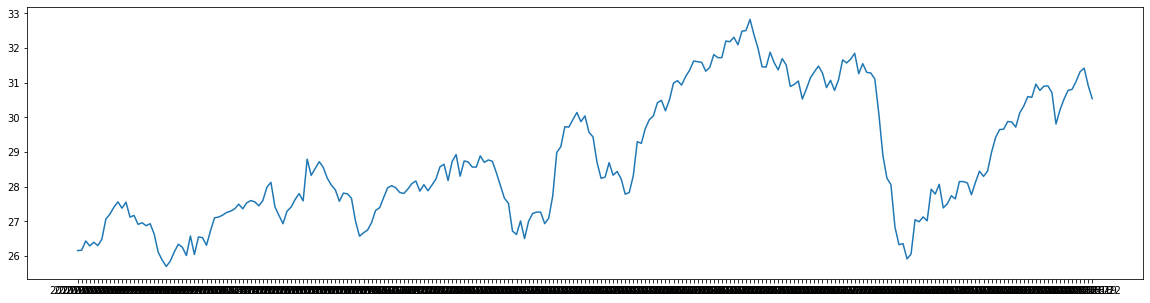

In [ ]:
import csv

date = []
close = []

# open file and write records
with open("NABData.csv",'r') as data:
  reader = csv.reader(data)
  header = next(reader)
  for record in reader:
    date.append(record[0])
    close.append(float(record[5]))

print(date)

# plot the results
from matplotlib import pyplot as plt
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(5)
plt.plot(date, close)

['2021-08-23', '2021-08-24', '2021-08-25', '2021-08-26', '2021-08-27', '2021-08-30', '2021-08-31', '2021-09-01', '2021-09-02', '2021-09-03', '2021-09-06', '2021-09-07', '2021-09-08', '2021-09-09', '2021-09-10', '2021-09-13', '2021-09-14', '2021-09-15', '2021-09-16', '2021-09-17', '2021-09-20', '2021-09-21', '2021-09-22', '2021-09-23', '2021-09-24', '2021-09-27', '2021-09-28', '2021-09-29', '2021-09-30', '2021-10-01', '2021-10-04', '2021-10-05', '2021-10-06', '2021-10-07', '2021-10-08', '2021-10-11', '2021-10-12', '2021-10-13', '2021-10-14', '2021-10-15', '2021-10-18', '2021-10-19', '2021-10-20', '2021-10-21', '2021-10-22', '2021-10-25', '2021-10-26', '2021-10-27', '2021-10-28', '2021-10-29', '2021-11-01', '2021-11-02', '2021-11-03', '2021-11-04', '2021-11-05', '2021-11-08', '2021-11-09', '2021-11-10', '2021-11-11', '2021-11-12', '2021-11-15', '2021-11-16', '2021-11-17', '2021-11-18', '2021-11-19', '2021-11-22', '2021-11-23', '2021-11-24', '2021-11-25', '2021-11-26', '2021-11-29', '2021

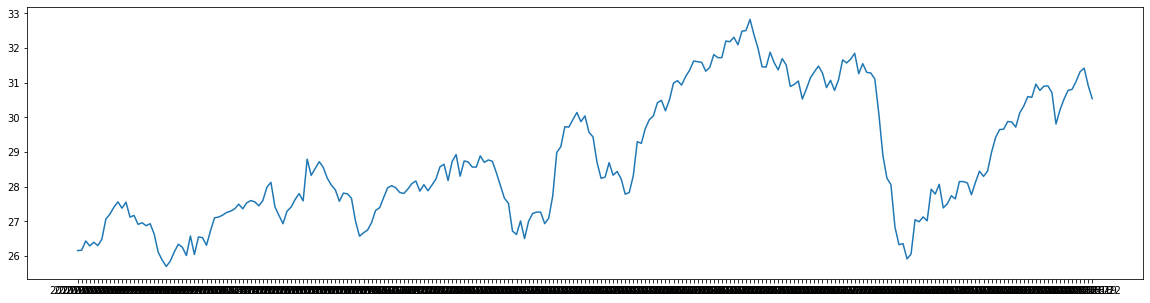

In [ ]:
import csv

date = []
close = []
ctr = 0

# open file and write records
with open ("NABData.csv",'r') as data:
  reader = csv.reader (data)
  header = next(reader)
  for record in reader:
    date.append(record[0])
    close.append(float(record [5]))
    '''ctr = ctr + 1
    if if ctr == 10:
      '''

print(date)

# plot the results
from matplotlib import pyplot as plt
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(5)
plt.plot(date,close)

# Module Pandas

## Using Pandas Module to Read in CSV Files (the “Easy Way”)

An easier method of importing files into Python is using the **Pandas** module. Pandas (name derived from “panel data”) is a data analysis library that, among other things, makes reading in CSV files and accessing the contained data much easier 

The primary data structure used in Pandas are a ***DataFrame***. A DataFrame has a *two-dimensional tabular format using rows and columns*. Using a DataFrame, we can reference columns by name, rather than having to count to figure out which column number we want. Pandas provides an assortment of methods like .mean() that will do summary statistics on our data

 
Read From a CSV File Using Pandas

Source: *Kaefer, F., & Kaefer, P. (2020). Introduction to Python 
Programming for Business and Social Science Applications. SAGE Publications, Inc. (US).*

In [7]:
pip install pd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [9]:
!curl "https://query1.finance.yahoo.com/v7/finance/download/BHP.AX?period1=1629553321&period2=1661089321&interval=1d&events=history&includeAdjustedClose=true" > BHPData.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 17550    0 17550    0     0  59897      0 --:--:-- --:--:-- --:--:-- 59693


In [27]:
#import pandas module
import pandas as pd

# Load the data
header = ['Date','Open','High','Low','Close',"Adj Close",'Volume']
data = pd.read_csv('BHPData.csv')
print(data)

           Date       Open       High        Low      Close  Adj Close  \
0    2021-08-23  44.959999  45.070000  44.200001  44.459999  39.971951   
1    2021-08-24  44.860001  45.189999  44.619999  44.919998  40.385513   
2    2021-08-25  45.410000  45.740002  45.250000  45.480000  40.888985   
3    2021-08-26  45.509998  45.599998  44.900002  44.950001  40.412491   
4    2021-08-27  44.889999  45.070000  44.680000  44.700001  40.187725   
..          ...        ...        ...        ...        ...        ...   
247  2022-08-15  39.180000  39.400002  38.799999  38.919998  38.919998   
248  2022-08-16  39.930000  41.049999  39.700001  40.509998  40.509998   
249  2022-08-17  41.290001  41.330002  40.430000  40.849998  40.849998   
250  2022-08-18  40.680000  41.189999  40.500000  41.150002  41.150002   
251  2022-08-19  41.470001  42.000000  41.389999  41.549999  41.549999   

       Volume  
0    11096534  
1     8552123  
2     9721644  
3     7817371  
4     7089293  
..        ...  

['2021-08-23', '2021-08-24', '2021-08-25', '2021-08-26', '2021-08-27', '2021-08-30', '2021-08-31', '2021-09-01', '2021-09-02', '2021-09-03', '2021-09-06', '2021-09-07', '2021-09-08', '2021-09-09', '2021-09-10', '2021-09-13', '2021-09-14', '2021-09-15', '2021-09-16', '2021-09-17', '2021-09-20', '2021-09-21', '2021-09-22', '2021-09-23', '2021-09-24', '2021-09-27', '2021-09-28', '2021-09-29', '2021-09-30', '2021-10-01', '2021-10-04', '2021-10-05', '2021-10-06', '2021-10-07', '2021-10-08', '2021-10-11', '2021-10-12', '2021-10-13', '2021-10-14', '2021-10-15', '2021-10-18', '2021-10-19', '2021-10-20', '2021-10-21', '2021-10-22', '2021-10-25', '2021-10-26', '2021-10-27', '2021-10-28', '2021-10-29', '2021-11-01', '2021-11-02', '2021-11-03', '2021-11-04', '2021-11-05', '2021-11-08', '2021-11-09', '2021-11-10', '2021-11-11', '2021-11-12', '2021-11-15', '2021-11-16', '2021-11-17', '2021-11-18', '2021-11-19', '2021-11-22', '2021-11-23', '2021-11-24', '2021-11-25', '2021-11-26', '2021-11-29', '2021

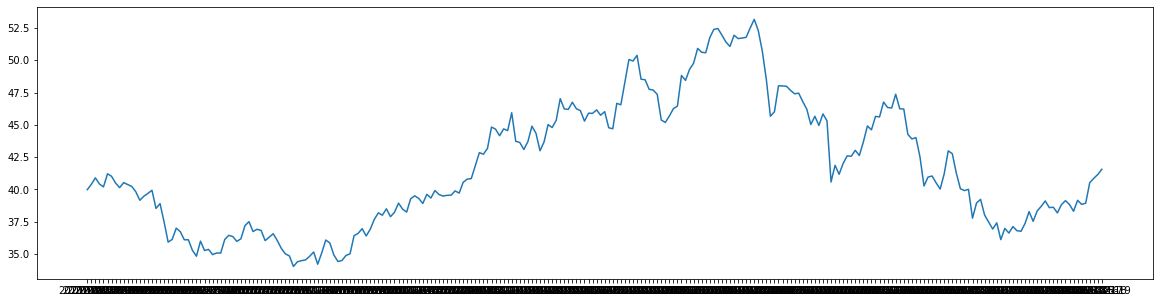

In [28]:
date = []
close = []

with open("BHPData.csv",'r') as data:
  reader = csv.reader(data)
  header = next(reader)
  for record in reader:
    date.append(record[0])
    close.append(float(record[5]))

print(date)

# plot the results
from matplotlib import pyplot as plt
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(5)
plt.plot(date, close)

## Daily Return of Stock Data

### Daily Return formula

Visiting a financial website that provides stock price information. Type a company’s name or its stock’s ticker symbol. Find in the historical prices section the stock’s closing price for any two consecutive days. For example, assume a stock’s closing price was \$36.75 yesterday and that its closing price was \$35.50 the previous day. Subtract the previous day’s closing price from the most recent day’s closing price. In this example, subtract \$35.50 from \$36.75 to get \$1.25.

Now divide the results by the previous day's closing prices to calculate the daily return.  Multiply this by 100 to convert to a percentage.  So $1.25 divided by #35.50 equals 0.035.  Multiply 0.035 by 100 to 3.5 percent.

    Daily return = (Today prices - Yesterday price) / Yesterday price



To find the URL, navigate to Yahoo finance, type in NAB.AX, click the 'Historical' tab.  towards the right is a download option.  right click on the download link and select 'Copy Link Address' form the popup menu.  Now paste to the URL assignment statement.

In [30]:
!curl 'https://query1.finance.yahoo.com/v7/finance/download/NAB.AX?period1=1630022400&period2=1661558400&interval=1d&events=history&includeAdjustedClose=true'

Date,Open,High,Low,Close,Adj Close,Volume
2021-08-27,27.430000,27.690001,27.400000,27.639999,26.399357,3557637
2021-08-30,27.700001,27.700001,27.360001,27.540001,26.303846,3533723
2021-08-31,27.490000,27.750000,27.440001,27.730000,26.485317,7925320
2021-09-01,27.750000,28.340000,27.620001,28.340000,27.067938,8519345
2021-09-02,28.400000,28.490000,28.090000,28.490000,27.211205,5917605
2021-09-03,28.500000,28.780001,28.340000,28.700001,27.411779,6780611
2021-09-06,28.510000,28.860001,28.379999,28.860001,27.564598,4803166
2021-09-07,28.799999,28.879999,28.469999,28.670000,27.383127,3677009
2021-09-08,28.450001,28.850000,28.440001,28.850000,27.555048,5225645
2021-09-09,28.680000,28.740000,28.160000,28.400000,27.125244,6209123
2021-09-10,28.650000,28.730000,28.270000,28.450001,27.173002,4490010
2021-09-13,28.250000,28.340000,28.030001,28.180000,26.915121,4081323
2021-09-14,28.299999,28.340000,28.040001,28.230000,26.962875,5473211
2021-09-15,28.010000,28.200001,27.889999,28.139999,26.876913,

In [31]:
!curl "https://query1.finance.yahoo.com/v7/finance/download/NAB.AX?period1=1629645492&period2=1661181492&interval=1d&events=history&includeAdjustedClose=true" > NABData.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 17513    0 17513    0     0  42610      0 --:--:-- --:--:-- --:--:-- 42507


In [152]:
#import pandas module
import pandas as pd
import numpy as np
import pandas_datareader as web
from matplotlib import pyplot as plt
%matplotlib inline

# Load the data
header= ['Date','Open','High','Low','Close',"Adj Close",'Volume']
data = pd.read_csv('NABData.csv')
print(data.head())

# Calculate the return
NBX_Daily_Returns = data['Adj Close'] / data['Adj Close'].shift(1)-1
print(NBX_Daily_Returns)

# Plot the results
f = plt.figure()
f.set_figwidth(16)
f.set_figheight(4.5)
f.text(-0.35,200,"Extreme Low\nreturns")
f.text(0.25,200,"Extreme High\nreturns")
plt.plot(NBX_Daily_Returns)

         Date       Open       High        Low      Close  Adj Close   Volume
0  2021-08-23  27.459999  27.520000  27.299999  27.389999  26.160580  3749665
1  2021-08-24  27.410000  27.450001  27.309999  27.400000  26.170130  3468022
2  2021-08-25  27.500000  27.680000  27.430000  27.680000  26.437563  5292358
3  2021-08-26  27.600000  27.660000  27.410000  27.530001  26.294296  3888823
4  2021-08-27  27.430000  27.690001  27.400000  27.639999  26.399359  3557637
0           NaN
1      0.000365
2      0.010219
3     -0.005419
4      0.003996
         ...   
248    0.007465
249    0.009021
250    0.003193
251   -0.015913
252   -0.012290
Name: Adj Close, Length: 253, dtype: float64


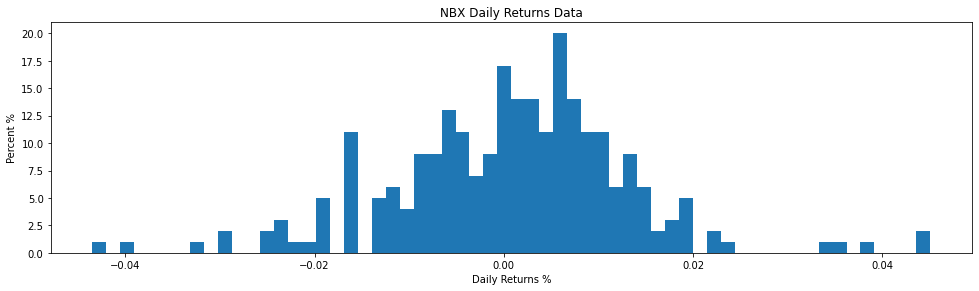

In [144]:
f = plt.figure()
ax1 = f.add_axes([0.1,0.1,0.8,0.8])
NBX_Daily_Returns.plot.hist(bins =60)
ax1.set_xlabel('Daily Returns %')
ax1.set_ylabel('Percent %')
ax1.set_title('NBX Daily Returns Data')
f.set_figwidth(16)
f.set_figheight(4)
plt.show()

Sources:

* Kaefer, F., & Kaefer, P. (2020). Introduction to Python 
Programming for Business and Social Science Applications. SAGE Publications

* Tony Gaddis, Starting out with Python, 5th Edition

* Deitel & Deitel, Intro to Python for Computer Science and Data Science, Global Edition
